In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

#plotting settings
sns.set()
%matplotlib inline

# Display
pd.set_option('display.max_rows', 999999)
pd.set_option('display.max_columns', 999999)
pd.set_option('display.width', 999999)

In [2]:
ds = pd.read_csv('./csse_covid_19_data/csse_covid_19_daily_reports/02-28-2020.csv')
ds.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403
1,NaN,South Korea,2020-02-28T08:53:03,2337,13,22
2,Guangdong,Mainland China,2020-02-28T08:53:03,1348,7,935
3,Henan,Mainland China,2020-02-28T09:23:02,1272,20,1112
4,Zhejiang,Mainland China,2020-02-28T10:03:12,1205,1,975


In [59]:
ds.shape

(114, 6)

In [4]:
ds1 = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
ds1.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,989,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,410,410
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,91,91


In [5]:
ds1.shape

(114, 42)

In [6]:
ds1.isnull().sum()

Province/State    53
Country/Region     0
Lat                0
Long               0
1/22/20            0
1/23/20            0
1/24/20            0
1/25/20            0
1/26/20            0
1/27/20            0
1/28/20            0
1/29/20            0
1/30/20            0
1/31/20            0
2/1/20             0
2/2/20             0
2/3/20             0
2/4/20             0
2/5/20             0
2/6/20             0
2/7/20             0
2/8/20             0
2/9/20             0
2/10/20            0
2/11/20            0
2/12/20            0
2/13/20            0
2/14/20            0
2/15/20            0
2/16/20            0
2/17/20            0
2/18/20            0
2/19/20            0
2/20/20            0
2/21/20            0
2/22/20            0
2/23/20            0
2/24/20            0
2/25/20            0
2/26/20            0
2/27/20            0
2/28/20            0
dtype: int64

In [7]:
#selected the columns needed to further merge with other dataset 'ds'
ds1_filter = pd.DataFrame(ds1, columns=['Country/Region','Lat','Long'])
ds1_filter.head()

,Country/Region,Lat,Long
0,Mainland China,31.8257,117.2264
1,Mainland China,40.1824,116.4142
2,Mainland China,30.0572,107.8740
3,Mainland China,26.0789,117.9874
4,Mainland China,36.0611,103.8343


In [50]:
# merged ds to ds1 to get latitude and longitude in one dataset by location of virus cases to use GeoPandas later on
ds2 = ds.merge(ds1_filter, on='Country/Region', how='outer')
ds2.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long
0,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403,31.8257,117.2264
1,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403,40.1824,116.4142
2,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403,30.0572,107.8740
3,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403,26.0789,117.9874
4,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403,36.0611,103.8343


In [51]:
#checking for null values
ds2.isnull().sum()

Province/State    53
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
Lat                0
Long               0
dtype: int64

In [52]:
ds2.shape

(1348, 8)

In [71]:
codvid_per_country = ds2.pivot_table(index=['Country/Region'], 
                                     values = ['Confirmed', 'Deaths', 'Recovered'],
                                    aggfunc='max')
codvid_per_country.head()

,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1,0,0
Afghanistan,1,0,0
Algeria,1,0,0
Australia,8,0,4
Austria,3,0,0


In [78]:
#created dataframe of top affected countries outside China 
codvid_per_country_top = codvid_per_country.sort_values(by='Confirmed', ascending=False).nlargest(25, 'Confirmed')
codvid_per_country_top = codvid_per_country_top.iloc[1:]
codvid_per_country_top

,Confirmed,Deaths,Recovered
Country/Region,,,
South Korea,2337,13,22
Italy,888,21,46
Others,705,1,10
Iran,388,34,73
Japan,228,4,22
Hong Kong,94,2,30
Singapore,93,0,62
France,57,2,11
Germany,48,0,16


# Coronavirus impact outside China barplots

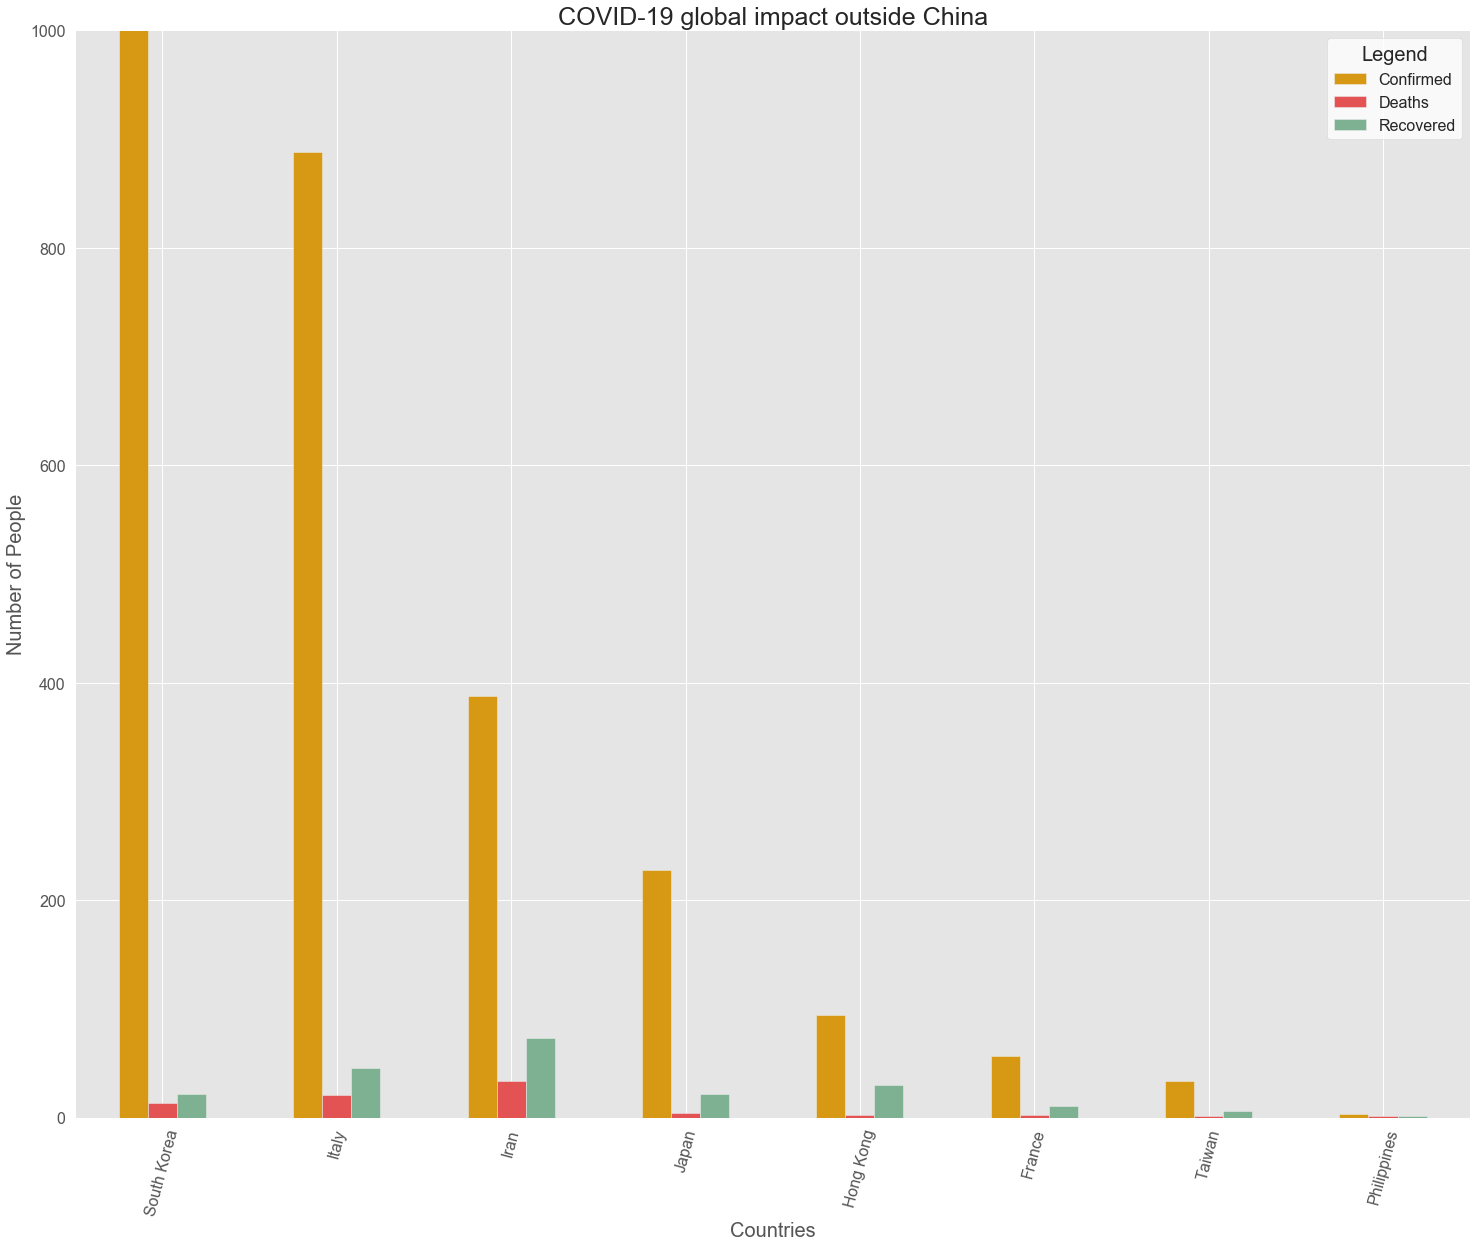

In [61]:
codvid_per_country_top.sort_values(by=['Confirmed'], ascending=False).plot.bar(figsize = (25, 20), 
                                                                            width=0.5, 
                                                                            align='center', 
                                                                            color = ['#D79913', 
                                                                                     '#E35353', 
                                                                                     '#7DB192'])

plt.ylabel('Number of People', fontsize=20)
plt.ylim(0, 1000)
plt.xlabel('Countries', fontsize=20)
plt.title('COVID-19 global impact outside China', fontsize=25)
plt.style.use('ggplot')

plt.xticks(fontsize=16, rotation=75)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc=0, facecolor = 'white', title = 'Legend', title_fontsize = 20)

plt.savefig('codvid_global_outside.jpg', dpi=480)
plt.show()

# Coronavirus impact inside China barplot

In [63]:
ds_china = ds2.pivot_table(index=['Province/State'], values = ['Country/Region','Confirmed', 'Deaths', 'Recovered'],
                                     aggfunc='max')

ds_china = ds_china[ds_china['Country/Region'] == 'Mainland China'].nlargest(10, 'Deaths')
ds_china

,Confirmed,Country/Region,Deaths,Recovered
Province/State,,,,
Hubei,65914,Mainland China,2682,26403
Henan,1272,Mainland China,20,1112
Heilongjiang,480,Mainland China,13,283
Beijing,410,Mainland China,7,257
Guangdong,1348,Mainland China,7,935
Anhui,990,Mainland China,6,821
Chongqing,576,Mainland China,6,422
Hebei,318,Mainland China,6,277
Shandong,756,Mainland China,6,405


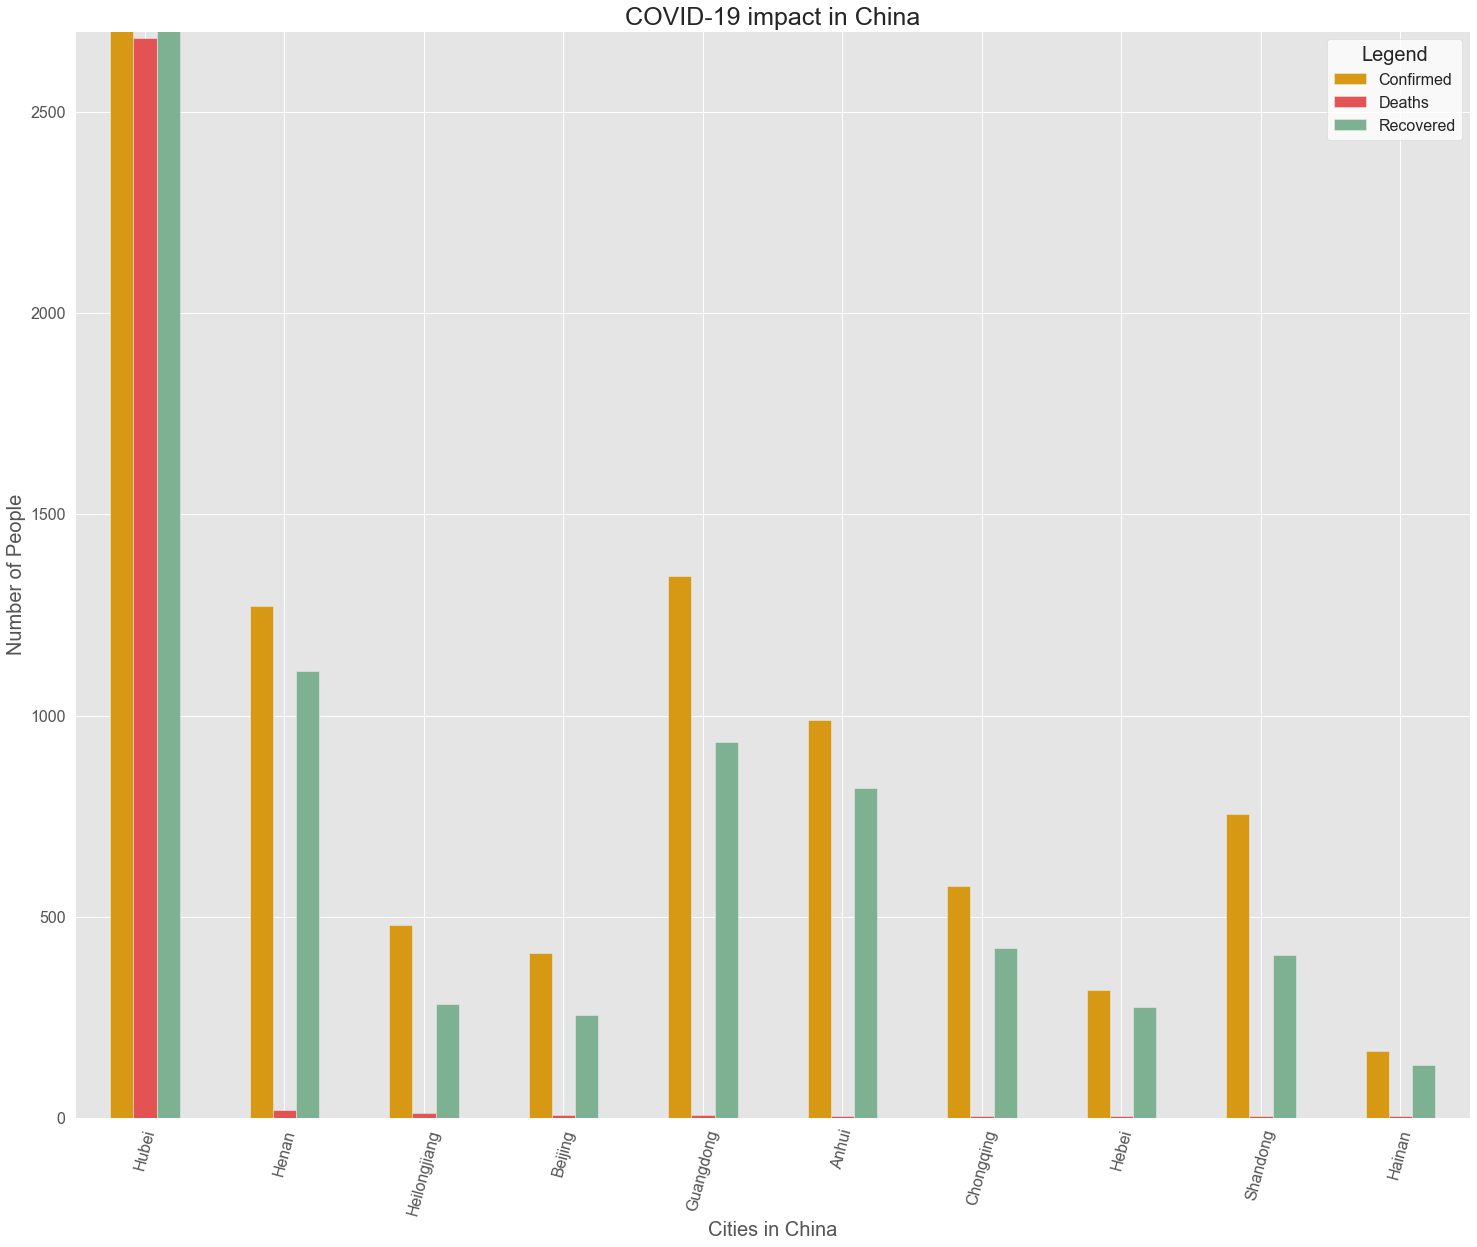

In [69]:
ds_china.sort_values(by=['Deaths'], ascending=False).plot.bar(figsize = (25, 20), width=0.5, align='center', color = ['#D79913', '#E35353', '#7DB192'])

plt.ylabel('Number of People', fontsize=20)
plt.ylim(0, 2700)
plt.xlabel('Cities in China', fontsize=20)
plt.title('COVID-19 impact in China', fontsize=25)
plt.style.use('ggplot')

plt.xticks(fontsize=16, rotation=75)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc=0, facecolor = 'white', title = 'Legend', title_fontsize = 20)

plt.savefig('codvid_in_China_.jpg', dpi=480)
plt.show()

# GeoPandas visualisation with geographic coordinates of coronavirus cases

In [16]:
#importing world map template
world_map = gpd.read_file('./Countries_WGS84/Countries_WGS84.shp')

In [17]:
ds2.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long
0,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403,31.8257,117.2264
1,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403,40.1824,116.4142
2,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403,30.0572,107.8740
3,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403,26.0789,117.9874
4,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403,36.0611,103.8343


In [18]:
ds2.shape

(1348, 8)

In [19]:
# designate coordinate system
crs = {'init' :'epsg:4326'}

# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(ds2['Long'], ds2['Lat'])]

# create GeoPandas dataframe
geo_ds = gpd.GeoDataFrame(ds2, crs = crs, geometry = geometry)

/Applications/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [20]:
geo_ds

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long,geometry
0,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403,31.82570,117.2264,POINT (117.22640 31.82570)
1,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403,40.18240,116.4142,POINT (116.41420 40.18240)
2,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403,30.05720,107.8740,POINT (107.87400 30.05720)
3,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403,26.07890,117.9874,POINT (117.98740 26.07890)
4,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403,36.06110,103.8343,POINT (103.83430 36.06110)
5,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403,23.34170,113.4244,POINT (113.42440 23.34170)
6,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403,23.82980,108.7881,POINT (108.78810 23.82980)
7,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403,26.81540,106.8748,POINT (106.87480 26.81540)
8,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403,19.19590,109.7453,POINT (109.74530 19.19590)
9,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403,38.04280,114.5149,POINT (114.51490 38.04280)


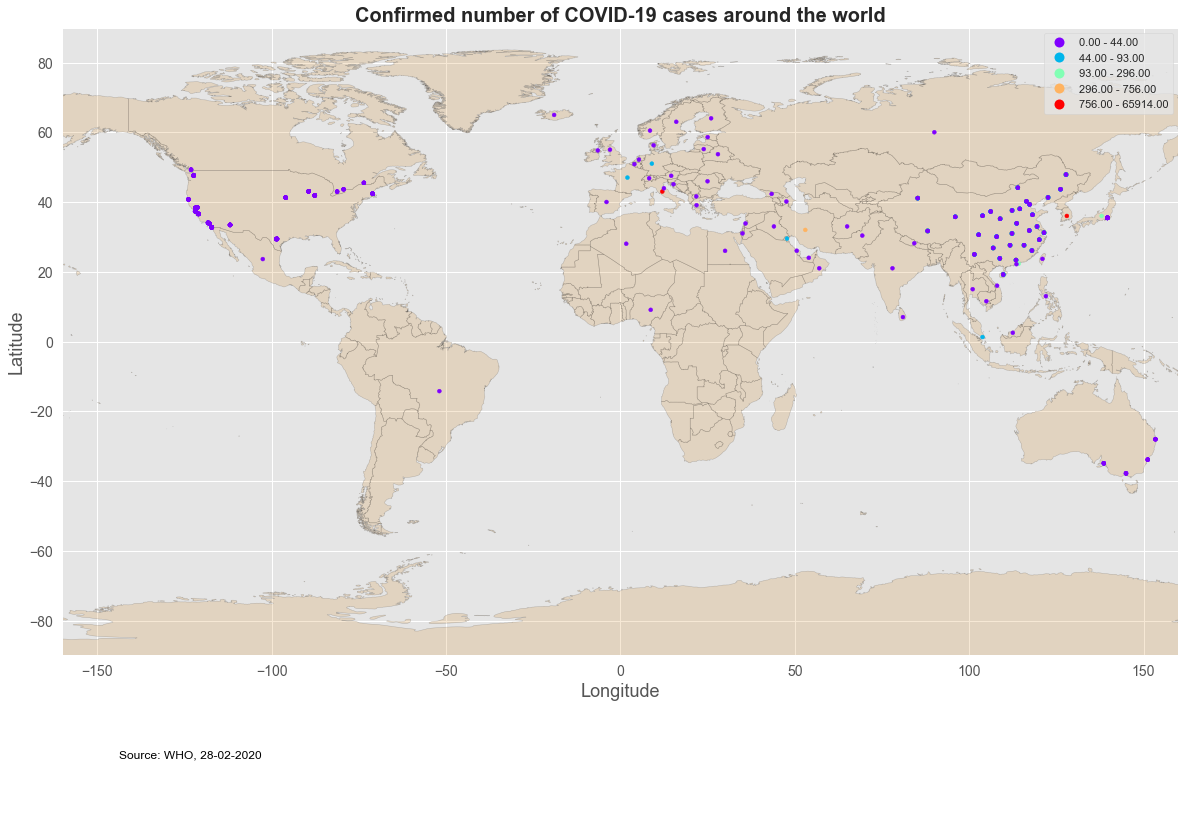

In [21]:
fig, ax = plt.subplots(figsize=(20,15))

world_map.plot(ax=ax, alpha=0.2, color='#D58E2F', edgecolor='black')

geo_ds.plot(column='Confirmed', ax=ax, markersize=15, 
            legend=True, 
            categorical=False, 
            scheme="jenks_caspall_sampled",
            cmap='rainbow')

plt.xlim(-160, 160)
plt.ylim(-90,90)
plt.title('Confirmed number of COVID-19 cases around the world', fontsize=20, fontweight='bold')
plt.ylabel('Latitude', fontsize=18)
plt.xlabel('Longitude', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

'''ax.legend(title='Legend',
          loc='upper right',
          fontsize=14,
          frameon=True,
          title_fontsize=18)'''

ax.annotate('Source: WHO, 28-02-2020', xy=(0.1, .08),  xycoords='figure fraction', 
            ha='left', va='top', fontsize=12, color='black')


plt.savefig('codvid_global_map_confirmed.jpg', dpi=480)
plt.show()